# Pandas - Data Aggregation

In [1]:
# Let's reload our dataframe
import pandas as pd

file_name = "https://github.com/har5hdeep5harma/RealWorld-DSAI-Ledger/raw/refs/heads/main/Data,%20Image%20and%20Reference%20Files/amazon_fires.csv"
df = pd.read_csv(file_name, encoding = "ISO-8859-1")
new_columns = {'ano' : 'year',
               'estado': 'state',
               'mes': 'month',
               'numero': 'number_of_fires',
               'encontro': 'date'}
df.rename(columns = new_columns, inplace=True)
df['state'] = df['state'].str.title()

df['number_of_fires'] = df['number_of_fires'].str.strip(" Fires")
df['number_of_fires'] = df['number_of_fires'].fillna(0)
df['number_of_fires'] = df['number_of_fires'].astype(float)


# Introuding the Map Function
month_translations = {'Janeiro': 'January',
'Fevereiro': 'February',
'Março': 'March',
'Abril': 'April',
'Maio': 'May',
'Junho': 'June',
'Julho': 'July',
'Agosto': 'August',
'Setembro': 'September',
'Outubro': 'October',
'Novembro': 'November',
'Dezembro': 'December'}

df["month"] = df["month"].map(month_translations)
df.head(15)

,year,month,state,number_of_fires,date
0,1998,January,Acre,0.0,1/1/1998
1,1999,January,Acre,0.0,1/1/1999
2,2000,January,Acre,0.0,1/1/2000
3,2001,January,Acre,0.0,1/1/2001
4,2002,January,Acre,0.0,1/1/2002
5,2003,January,Acre,10.0,1/1/2003
6,2004,January,Acre,0.0,1/1/2004
7,2005,January,Acre,12.0,1/1/2005
8,2006,January,Acre,4.0,1/1/2006
9,2007,January,Acre,0.0,1/1/2007


# Using the Groupby function

This is one of the most useful data analysis tools provided by Pandas. It allows us to common segments of data and perform an operation on. For example, we can group our 'States' and find the sum total of fires per state.

In [2]:
# First let's aggregate date based on each State
# We'll create our groupby object

df.groupby('state')

In [3]:
# How do we use our object?

state_groups = df.groupby('state')
state_groups.get_group('Rio')

,year,month,state,number_of_fires,date
4303,1998,January,Rio,0.0,1/1/1998
4304,1999,January,Rio,0.0,1/1/1999
4305,2000,January,Rio,0.0,1/1/2000
4306,2001,January,Rio,0.0,1/1/2001
4307,2002,January,Rio,0.0,1/1/2002
...,...,...,...,...,...
5015,2012,December,Rio,38.0,1/1/2012
5016,2013,December,Rio,62.0,1/1/2013
5017,2014,December,Rio,31.0,1/1/2014
5018,2015,December,Rio,42.0,1/1/2015


In [4]:
# Let's look at the groups we made

# It is a dictionary where each key corresponds to a state name
# The values are the index ranges for each group

state_groups.groups

{'Acre': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Alagoas': [239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, ...], 'Amapa': [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 4

In [5]:
# We can use Size to get a count of the number of items in each group
state_groups.size()

,0
state,
Acre,239
Alagoas,240
Amapa,239
Amazonas,239
Bahia,239
Ceara,239
Distrito Federal,239
Espirito Santo,239
Goias,239


# Let's now use some Aggregation funtions

* mean()
* size()
* count()
* sum()
* min()
* max()

In [8]:
state_groups.sum(numeric_only=True)

,year,number_of_fires
state,,
Acre,479783,17971.030
Alagoas,481800,4594.000
Amapa,479783,20108.576
Amazonas,479783,29890.129
Bahia,479783,43411.951
Ceara,479783,30395.042
Distrito Federal,479783,3501.000
Espirito Santo,479783,37002.276
Goias,479783,23362.852


In [10]:
state_groups.mean(numeric_only=True)

# Note the top left cell named 'state' is now the index
# Previously the index was numbered numerically
# The columns year and number_of_fires are the grouped means

,year,number_of_fires
state,,
Acre,2007.460251,75.192594
Alagoas,2007.500000,19.141667
Amapa,2007.460251,84.136301
Amazonas,2007.460251,125.063301
Bahia,2007.460251,181.639962
Ceara,2007.460251,127.175908
Distrito Federal,2007.460251,14.648536
Espirito Santo,2007.460251,154.821238
Goias,2007.460251,97.752519


# Combining our groupby into one concise statement

In [11]:
df.groupby('state')['number_of_fires'].mean()

# In the above code:
# 'state' is what we're grouping
# 'number_of_fires' is column who's values we're running our aggregate mean function on
# our index will be 'state' after running this

,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


# Pivot Table

For excel users, you may be thinking this

In [12]:
import numpy as np

df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)

/tmp/ipython-input-12-2708190045.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)


,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


In [13]:
# Another feature provided by the Pivot function
# is that we can add "All" (see last line) which gives the mean of all

df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)

/tmp/ipython-input-13-499782125.py:4: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)


,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


/tmp/ipython-input-14-1458114940.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fires_per_state = df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)


<Axes: title={'center': 'Brazil Fires by State'}, ylabel='state'>

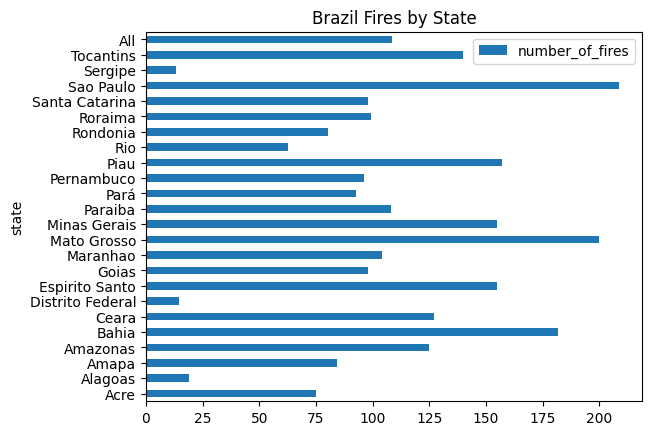

In [14]:
# Can be useful when creating a plot

fires_per_state = df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)

# We push the horizontal scale to the right just to make it more aesthetic
max_val = fires_per_state["number_of_fires"].max() + 10

fires_per_state.plot(kind='barh', title='Brazil Fires by State', xlim=(0,max_val), legend=True)

# Aggregating Multiple Columns Using Pivot Tables

In [15]:
df.shape[0]

6454

In [16]:
# Before we begin, let's create a column of fake date called "severity"
# in this column we'll use a rating of 1 - 5 to indicate severity of each fire

import numpy as np

df['severity'] = np.random.randint(1, 5, df.shape[0])
df.head(10)

,year,month,state,number_of_fires,date,severity
0,1998,January,Acre,0.0,1/1/1998,2
1,1999,January,Acre,0.0,1/1/1999,2
2,2000,January,Acre,0.0,1/1/2000,2
3,2001,January,Acre,0.0,1/1/2001,3
4,2002,January,Acre,0.0,1/1/2002,1
5,2003,January,Acre,10.0,1/1/2003,4
6,2004,January,Acre,0.0,1/1/2004,1
7,2005,January,Acre,12.0,1/1/2005,4
8,2006,January,Acre,4.0,1/1/2006,4
9,2007,January,Acre,0.0,1/1/2007,1


## Format for aggregating multiple columns of data


**DataFrame.pivot_table([column1_values, column2_values], column_index)**

In [17]:
# Now let's aggregate multiple columns
# Previous we did it like:
# df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)

df.pivot_table(['number_of_fires', 'severity'], 'state')

,number_of_fires,severity
state,,
Acre,75.192594,2.539749
Alagoas,19.141667,2.375000
Amapa,84.136301,2.506276
Amazonas,125.063301,2.606695
Bahia,181.639962,2.464435
Ceara,127.175908,2.535565
Distrito Federal,14.648536,2.493724
Espirito Santo,154.821238,2.564854
Goias,97.752519,2.476987


In [18]:
# Stating things more explicitly and adding Margins
df.pivot_table(values=['number_of_fires', 'severity'], index='state', aggfunc=np.mean, margins=True)

/tmp/ipython-input-18-3238473355.py:2: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values=['number_of_fires', 'severity'], index='state', aggfunc=np.mean, margins=True)


,number_of_fires,severity
state,,
Acre,75.192594,2.539749
Alagoas,19.141667,2.375000
Amapa,84.136301,2.506276
Amazonas,125.063301,2.606695
Bahia,181.639962,2.464435
Ceara,127.175908,2.535565
Distrito Federal,14.648536,2.493724
Espirito Santo,154.821238,2.564854
Goias,97.752519,2.476987


In [19]:
# Aggregating with multiple functions on multiple columns

df.pivot_table(['number_of_fires', 'severity'], 'state', aggfunc=[np.mean, np.min, np.max], margins=True)

/tmp/ipython-input-19-367421575.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(['number_of_fires', 'severity'], 'state', aggfunc=[np.mean, np.min, np.max], margins=True)
/tmp/ipython-input-19-367421575.py:3: FutureWarning: The provided callable <function min at 0x7c01ffbc1b20> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.pivot_table(['number_of_fires', 'severity'], 'state', aggfunc=[np.mean, np.min, np.max], margins=True)
/tmp/ipython-input-19-367421575.py:3: FutureWarning: The provided callable <function max at 0x7c01ffbc19e0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used dire

mean                       min           \
                 number_of_fires  severity number_of_fires severity   
state                                                                 
Acre                   75.192594  2.539749             0.0        1   
Alagoas                19.141667  2.375000             0.0        1   
Amapa                  84.136301  2.506276             0.0        1   
Amazonas              125.063301  2.606695             0.0        1   
Bahia                 181.639962  2.464435             0.0        1   
Ceara                 127.175908  2.535565             0.0        1   
Distrito Federal       14.648536  2.493724             0.0        1   
Espirito Santo        154.821238  2.564854             0.0        1   
Goias                  97.752519  2.476987             0.0        1   
Maranhao              103.929577  2.535565             0.0        1   
Mato Grosso           199.930910  2.453975             0.0        1   
Minas Gerais          154.821238  2.414226             0.0        1   
Paraiba               108.209033  2.520921             0.0        1   
Pará                   92.569640  2.430962             0.0        1   
Pernambuco             96.062762  2.397490             0.0        1   
Piau                  157.082222  2.493724             0.0        1   
Rio                    62.482378  2.514644             0.0        1   
Rondonia               80.499703  2.456067             0.0        1   
Roraima                99.368510  2.497908             0.0        1   
Santa Catarina         97.752519  2.493724             0.0        1   
Sao Paulo             208.737230  2.673640             0.0        1   
Sergipe                13.251046  2.548117             0.0        1   
Tocantins             139.922632  2.514644             0.0        1   
All                   108.404542  2.500465             0.0        1   

                             max           
                 number_of_fires severity  
state                                      
Acre                       960.0        4  
Alagoas                    162.0        4  
Amapa                      969.0        4  
Amazonas                   998.0        4  
Bahia                      995.0        4  
Ceara                      995.0        4  
Distrito Federal           196.0        4  
Espirito Santo             959.0        4  
Goias                      759.0        4  
Maranhao                   972.0        4  
Mato Grosso                979.0        4  
Minas Gerais               959.0        4  
Paraiba                    987.0        4  
Pará                       971.0        4  
Pernambuco                 859.0        4  
Piau                       943.0        4  
Rio                        885.0        4  
Rondonia                   969.0        4  
Roraima                    820.0        4  
Santa Catarina             759.0        4  
Sao Paulo                  981.0        4  
Sergipe                    198.0        4  
Tocantins                  989.0        4  
All                        998.0        4

# Learning to use GroupBy Agg

### The syntax is as follows:

**DataFrame.groupby(index)[column1].agg(function)**

In [20]:
# Similarly we can use the 'agg' function with groupbys

df.groupby('state')['number_of_fires'].agg(np.mean)

/tmp/ipython-input-20-565569941.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('state')['number_of_fires'].agg(np.mean)


,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


In [22]:
## Applying it to multiple columns

df.groupby('state')[['number_of_fires', 'severity']].agg(np.mean)

/tmp/ipython-input-22-2074249548.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('state')[['number_of_fires', 'severity']].agg(np.mean)


,number_of_fires,severity
state,,
Acre,75.192594,2.539749
Alagoas,19.141667,2.375000
Amapa,84.136301,2.506276
Amazonas,125.063301,2.606695
Bahia,181.639962,2.464435
Ceara,127.175908,2.535565
Distrito Federal,14.648536,2.493724
Espirito Santo,154.821238,2.564854
Goias,97.752519,2.476987


In [24]:
## Applying multiple functions

df.groupby('state')[['number_of_fires', 'severity']].agg([np.mean, np.max])

/tmp/ipython-input-24-1217744158.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('state')[['number_of_fires', 'severity']].agg([np.mean, np.max])
/tmp/ipython-input-24-1217744158.py:3: FutureWarning: The provided callable <function max at 0x7c01ffbc19e0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('state')[['number_of_fires', 'severity']].agg([np.mean, np.max])
/tmp/ipython-input-24-1217744158.py:3: FutureWarning: The provided callable <function mean at 0x7c01ffbc23e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
 

number_of_fires         severity    
                            mean    max      mean max
state                                                
Acre                   75.192594  960.0  2.539749   4
Alagoas                19.141667  162.0  2.375000   4
Amapa                  84.136301  969.0  2.506276   4
Amazonas              125.063301  998.0  2.606695   4
Bahia                 181.639962  995.0  2.464435   4
Ceara                 127.175908  995.0  2.535565   4
Distrito Federal       14.648536  196.0  2.493724   4
Espirito Santo        154.821238  959.0  2.564854   4
Goias                  97.752519  759.0  2.476987   4
Maranhao              103.929577  972.0  2.535565   4
Mato Grosso           199.930910  979.0  2.453975   4
Minas Gerais          154.821238  959.0  2.414226   4
Paraiba               108.209033  987.0  2.520921   4
Pará                   92.569640  971.0  2.430962   4
Pernambuco             96.062762  859.0  2.397490   4
Piau                  157.082222  943.0  2.493724   4
Rio                    62.482378  885.0  2.514644   4
Rondonia               80.499703  969.0  2.456067   4
Roraima                99.368510  820.0  2.497908   4
Santa Catarina         97.752519  759.0  2.493724   4
Sao Paulo             208.737230  981.0  2.673640   4
Sergipe                13.251046  198.0  2.548117   4
Tocantins             139.922632  989.0  2.514644   4

# Using custom Agg functions

In [25]:
def max_minus_mean(grouped_data):
    return(grouped_data.max() - grouped_data.mean())

df.groupby('state')['number_of_fires'].agg(max_minus_mean)

,number_of_fires
state,
Acre,884.807406
Alagoas,142.858333
Amapa,884.863699
Amazonas,872.936699
Bahia,813.360038
Ceara,867.824092
Distrito Federal,181.351464
Espirito Santo,804.178762
Goias,661.247481


In [26]:
# Converting our series result back into a dataFrame

pd.DataFrame(df.groupby('state')['number_of_fires'].agg(max_minus_mean)).reset_index()

,state,number_of_fires
0,Acre,884.807406
1,Alagoas,142.858333
2,Amapa,884.863699
3,Amazonas,872.936699
4,Bahia,813.360038
5,Ceara,867.824092
6,Distrito Federal,181.351464
7,Espirito Santo,804.178762
8,Goias,661.247481
9,Maranhao,868.070423
